In [0]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
plt.style.use('bmh')

In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,282.831299
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,288.442780
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,288.333313


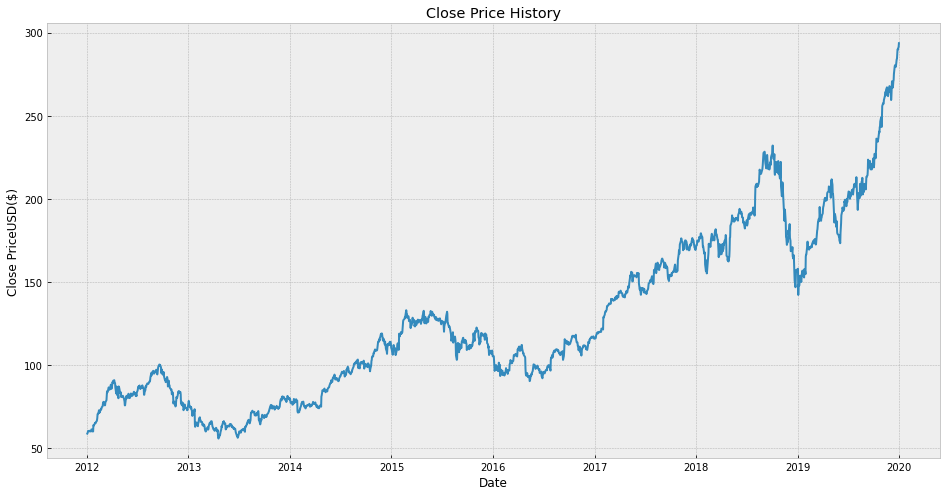

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close PriceUSD($)')
plt.plot(df['Close'])
plt.show()

In [4]:
df = df[['Close']]
df.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [9]:
forecast_out =30
df['Prediction']  = df[['Close']].shift(-forecast_out)
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,Prediction
Date,,
2019-12-24,284.269989,NaN
2019-12-26,289.910004,NaN
2019-12-27,289.799988,NaN
2019-12-30,291.519989,NaN
2019-12-31,293.649994,NaN


In [11]:
X = np.array(df.drop(['Prediction'],1))
X = X[:-forecast_out]
print(X)

[[ 58.74714279]
 [ 59.06285858]
 [ 59.71857071]
 ...
 [264.47000122]
 [262.64001465]
 [265.76000977]]


In [14]:
y = np.array(df['Prediction'])
y= y[:-forecast_out]
print(y)

[ 71.09571075  71.74428558  71.73143005 ... 289.79998779 291.51998901
 293.6499939 ]


In [0]:
x_train,x_test,y_train,y_test= train_test_split(X, y, test_size=0.25,random_state=10)

In [0]:
#create svm model
svr_rbf = SVR(C=1e3, gamma=0.001).fit(x_train,y_train)
# create linera regression mmodel
lr = LinearRegression().fit(x_train,y_train)

In [26]:
x_future = df.drop(['Prediction'],1)[:-forecast_out]
x_future = x_future.tail(forecast_out)
x_future = np.array(x_future)
x_future

array([[227.05999756],
       [224.3999939 ],
       [227.02999878],
       [230.08999634],
       [236.21000671],
       [235.86999512],
       [235.32000732],
       [234.36999512],
       [235.27999878],
       [236.41000366],
       [240.50999451],
       [239.96000671],
       [243.17999268],
       [243.58000183],
       [246.58000183],
       [249.05000305],
       [243.28999329],
       [243.25999451],
       [248.75999451],
       [255.82000732],
       [257.5       ],
       [257.13000488],
       [257.23999023],
       [259.42999268],
       [260.14001465],
       [262.20001221],
       [261.95999146],
       [264.47000122],
       [262.64001465],
       [265.76000977]])

In [28]:
#Show the SVM model Prediction
svm_prediction = svr_rbf.predict(x_future)
print('SVM MODEL PREDICTION',svm_prediction)
print()
#Show the Linear Regression Prediction
lr_prediction = lr.predict(x_future)
print('LINEAR REGRESSION MODEL PREDICTION',lr_prediction)

SVM MODEL PREDICTION [227.99819542 223.44694864 227.94138466 234.32396111 249.41342736
 248.54864701 247.14711585 244.72815923 247.0451143  249.92106048
 259.86592534 258.60762282 265.47989423 266.2415923  271.23149431
 274.40421009 265.69155332 265.63399511 274.07180635 280.30353931
 281.64414064 281.33878782 281.42881975 283.3827637  284.10059164
 286.48478114 286.18194112 289.70036795 287.05806951 291.81247163]

LINEAR REGRESSION MODEL PREDICTION [232.31217745 229.59449903 232.28152823 235.4078733  241.66057903
 241.31319523 240.75128248 239.78067191 240.71040647 241.86491235
 246.05380006 245.49188731 248.78168969 249.19037193 252.25541856
 254.77897486 248.89407535 248.86342614 254.48267829 261.69576779
 263.41218642 263.03416899 263.14653907 265.3840256  266.10944242
 268.21410528 267.96888034 270.53331267 268.66364794 271.85129145]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


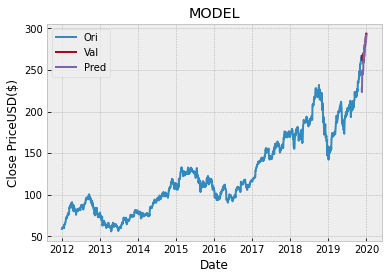

In [46]:
valid = df[X.shape[0]:]
valid['Prediction'] = svm_prediction
plt.figure(figsize=(20,10))
plt.title('MODEL')
plt.xlabel('Date')
plt.ylabel('Close PriceUSD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Ori','Val','Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


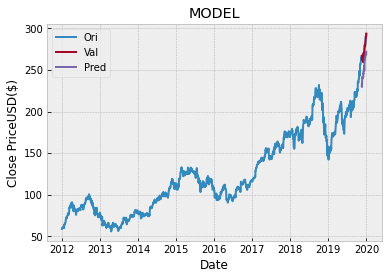

In [47]:
prediction = lr_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = prediction
plt.figure(figsize=(20,10))
plt.title('MODEL')
plt.xlabel('Date')
plt.ylabel('Close PriceUSD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Ori','Val','Pred'])
plt.show()

In [39]:
lr_confidence = lr.score(x_test,y_test)
print('LINEAR REGRESSION MODEL CONFIDENCE',lr_confidence)

LINEAR REGRESSION MODEL CONFIDENCE 0.9351180747893716


In [40]:
svm_confidence = svr_rbf.score(x_test,y_test)
print('SVM MODEL CONFIDENCE',svm_confidence)

SVM MODEL CONFIDENCE 0.9369403664809587
